In [1]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
pf.__version__

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


'0.0.50'

In [2]:
lei_fi = pd.read_excel('lei_fi.xlsx', 'Sheet1')

lei_fi.head()

,Unnamed: 0,filename_x,Corrected_Splitting,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction,T_K,filename,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2
0,0,LL4_12-FI#1,102.986692,103.229513,1285.723793,174.337129,1285.723793,241.761785,0.565379,1.639294,...,"['0h', '3m', '46s']",3:57:31 PM\n,57451.0,1325.102,0.997648,1423.15,NaN,NaN,NaN,NaN
1,1,LL4_12-FI#2,102.987574,103.230785,1285.710016,236.427779,1285.710016,325.080164,0.554885,1.919757,...,"['0h', '3m', '46s']",4:04:13 PM\n,57853.0,1325.102,0.997644,1423.15,NaN,NaN,NaN,NaN
2,2,LL4_12-MI#2,102.939206,103.181485,1285.821409,393.830403,1285.821409,511.938856,0.520877,2.482970,...,"['0h', '3m', '46s']",3:50:15 PM\n,57015.0,1325.102,0.997652,1423.15,NaN,NaN,NaN,NaN
3,3,LL4_2-FI#1,103.071775,103.317680,1285.443051,333.482518,1285.443051,522.874041,0.589273,2.553256,...,"['0h', '3m', '46s']",4:50:40 PM\n,60640.0,1325.102,0.997620,1423.15,NaN,NaN,NaN,NaN
4,4,LL4_27-FI#1,103.064244,103.308134,1285.549600,373.534033,1285.549600,565.282359,0.561144,2.223192,...,"['0h', '3m', '46s']",4:12:58 PM\n,58378.0,1325.102,0.997639,1423.15,NaN,NaN,NaN,NaN


In [3]:
densities_lei=pf.calculate_density_cornell(temp='SupCrit', Split=lei_fi['Corrected_Splitting'])

densities_lei.head()

,Preferred D,in range,Notes,LowD_RT,HighD_RT,LowD_SC,MedD_SC,HighD_SC,Temperature,Splitting,Preferred_D
0,0.100214,Y,"SupCrit, low density",0.094276,-0.253313,0.100214,0.100457,-0.225013,SupCrit,102.986692,NaN
1,0.100545,Y,"SupCrit, low density",0.094605,-0.252527,0.100545,0.100785,-0.224226,SupCrit,102.987574,NaN
2,0.082357,Y,"SupCrit, low density",0.076552,-0.296026,0.082357,0.082951,-0.267749,SupCrit,102.939206,NaN
3,0.132209,Y,"SupCrit, low density",0.126034,-0.178430,0.132209,0.132711,-0.150149,SupCrit,103.071775,NaN
4,0.129377,Y,"SupCrit, low density",0.123223,-0.184972,0.129377,0.129811,-0.156687,SupCrit,103.064244,NaN


In [4]:
densitiesfilt_lei=densities_lei[densities_lei['Preferred D']>0] # filters out negative densities

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100
working on sample number 120
working on sample number 140
working on sample number 160
working on sample number 180
working on sample number 200


,Sample_ID,Filename,CO2_density_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,LL4_12,LL4_12-FI#1,0.100214,1.306829,0.288088,0.288045,0.287023,0.031842,1.306256,1.302115,0.140826,50,0.01,0.0,1423.15,0.100214,ryan_lerner,None,SW96
1,LL4_12,LL4_12-FI#2,0.100545,1.311344,0.289109,0.288599,0.287415,0.030945,1.308732,1.303851,0.136852,50,0.01,0.0,1423.15,0.100545,ryan_lerner,None,SW96
2,LL4_12,LL4_12-MI#2,0.082357,1.065582,0.233811,0.235660,0.233528,0.031074,1.073468,1.064319,0.138644,50,0.01,0.0,1423.15,0.082357,ryan_lerner,None,SW96
3,LL4_2,LL4_2-FI#1,0.132209,1.749321,0.388957,0.387175,0.385535,0.036270,1.741094,1.734431,0.157739,50,0.01,0.0,1423.15,0.132209,ryan_lerner,None,SW96
4,LL4_27,LL4_27-FI#1,0.129377,1.709599,0.379832,0.379757,0.379291,0.034496,1.708842,1.707245,0.150254,50,0.01,0.0,1423.15,0.129377,ryan_lerner,None,SW96


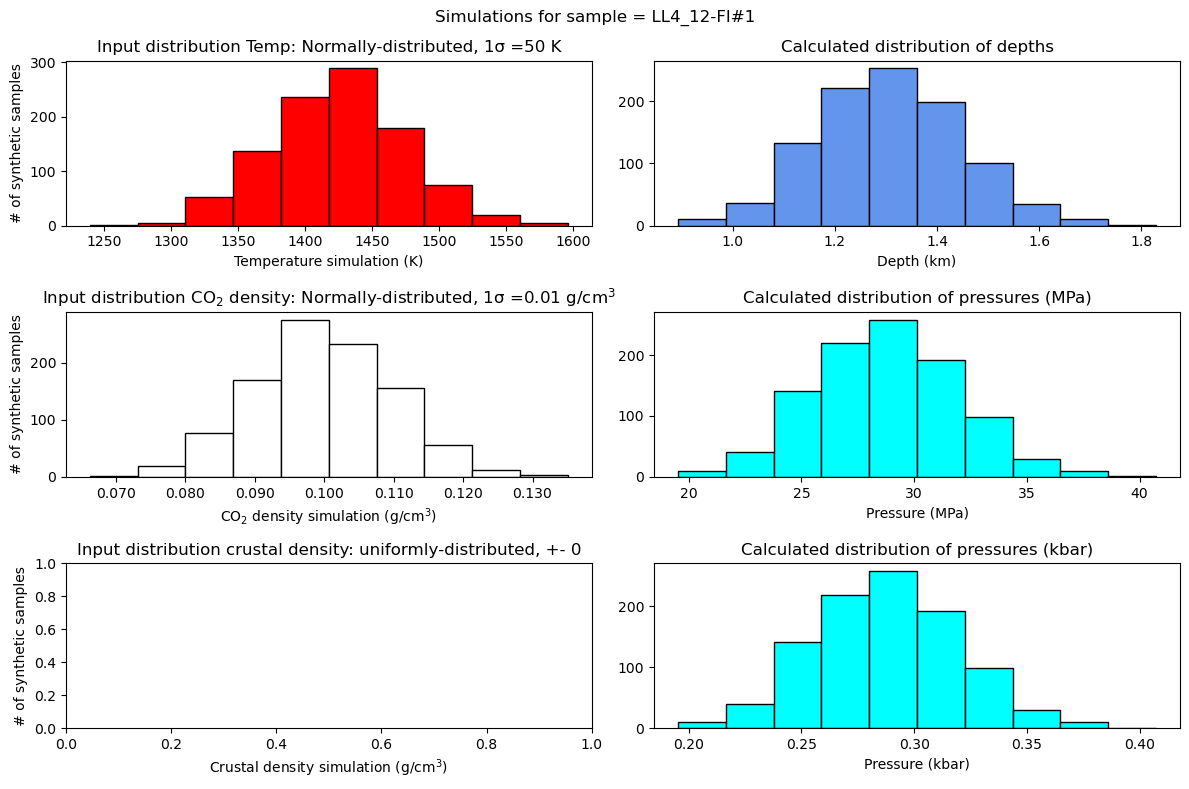

In [9]:
DP_lei, DP_lei_all,fig=pf.propagate_FI_uncertainty(sample_ID=lei_fi['filename_x'],
                                               CO2_density_gcm3=densitiesfilt_lei['Preferred D'],
                                                error_CO2_dens=0.01, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',   
                                               T_K=1150+273.15,
                                               N_dup=1000,
                                               crust_dens_kgm3=None, model='ryan_lerner',
                                               error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                                               EOS='SW96',plot_figure=True, fig_i=0
                                              )

DP_lei.insert(0,'Sample_ID',DP_lei["Filename"].str.split("-",n=1,expand=True)[0])
DP_lei.head()

In [10]:
 DP_lei_all

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,LL4_12-FI#1,0.282201,28.220093,1.280770,None,ryan_lerner,1436.071857,0.097432
1,LL4_12-FI#1,0.269287,26.928683,1.223515,None,ryan_lerner,1407.215483,0.095127
2,LL4_12-FI#1,0.297905,29.790523,1.350226,None,ryan_lerner,1485.055924,0.099180
3,LL4_12-FI#1,0.324121,32.412124,1.465763,None,ryan_lerner,1470.103430,0.108335
4,LL4_12-FI#1,0.251166,25.116562,1.142962,None,ryan_lerner,1417.616880,0.088455
...,...,...,...,...,...,...,...,...
995,LL7-FI28-MI#5_rep1,0.183786,18.378564,0.841234,None,ryan_lerner,1450.853507,0.064253
996,LL7-FI28-MI#5_rep1,0.163060,16.306043,0.747719,None,ryan_lerner,1464.891453,0.056737
997,LL7-FI28-MI#5_rep1,0.202721,20.272103,0.926381,None,ryan_lerner,1355.273121,0.075486
998,LL7-FI28-MI#5_rep1,0.170701,17.070059,0.782231,None,ryan_lerner,1431.410531,0.060663
